In this notebook, we're solving beam equations using Macaulay's method.

<div>
<img src="data\data_Singularity_function_with_hinged_beam\Constructie3.gif" width="500"/>
</div>
As this is a statically determinate structure, first the $M$- and $V$-line are solved for.

In [1]:
import sympy as sp

In [2]:
C1, C2, x, EI = sp.symbols('C1, C2, x, EI')
A_v, B_v = sp.symbols('A_v, B_v')
q0 = sp.symbols('q0')

The function $q(x)$ is specified as a function of all external forces + support reactions

In [3]:
q = A_v * sp.SingularityFunction(x,0,-1) + q0 *sp.SingularityFunction(x,0,0) - q0*sp.SingularityFunction(x,4,0) + B_v * sp.SingularityFunction(x,8,-1)
display(q)

A_v*SingularityFunction(x, 0, -1) + B_v*SingularityFunction(x, 8, -1) + q0*SingularityFunction(x, 0, 0) - q0*SingularityFunction(x, 4, 0)

The functions $V_1(x)$ and $M_1(x)$ are calculated as integrals of $q(x)$. These represent the sum of vertical and sum of moments up to a position $x$.

In [4]:
V1 = -sp.integrate(q,x)
display(V1)
M1 = sp.integrate(V1,x)
display(M1)

-A_v*SingularityFunction(x, 0, 0) - B_v*SingularityFunction(x, 8, 0) - q0*SingularityFunction(x, 0, 1) + q0*SingularityFunction(x, 4, 1)

-A_v*SingularityFunction(x, 0, 1) - B_v*SingularityFunction(x, 8, 1) - q0*SingularityFunction(x, 0, 2)/2 + q0*SingularityFunction(x, 4, 2)/2

Now the force and moment equilibria can be specified by substituting $x=8$ for the equilibrium of the whole structure.

In [5]:
eq1 = sp.Eq(V1.subs(x,8),0)
eq2 = sp.Eq(M1.subs(x,8),0)
display(eq1)
display(eq2)

Eq(-A_v - B_v - 4*q0, 0)

Eq(-8*A_v - 24*q0, 0)

The three unknown support reactions can now be solved

In [6]:
sol = sp.solve((eq1,eq2),(A_v,B_v))
display(sol)

{A_v: -3*q0, B_v: -q0}

The $M-$ and $V-$lines can now be found by subsituting our support reactions

In [7]:
M_sol = M1.subs(sol)
display(M_sol)
V_sol = V1.subs(sol)
display(V_sol)

3*q0*SingularityFunction(x, 0, 1) - q0*SingularityFunction(x, 0, 2)/2 + q0*SingularityFunction(x, 4, 2)/2 + q0*SingularityFunction(x, 8, 1)

3*q0*SingularityFunction(x, 0, 0) - q0*SingularityFunction(x, 0, 1) + q0*SingularityFunction(x, 4, 1) + q0*SingularityFunction(x, 8, 0)

60*SingularityFunction(x, 0, 1) - 10*SingularityFunction(x, 0, 2) + 10*SingularityFunction(x, 4, 2) + 20*SingularityFunction(x, 8, 1)

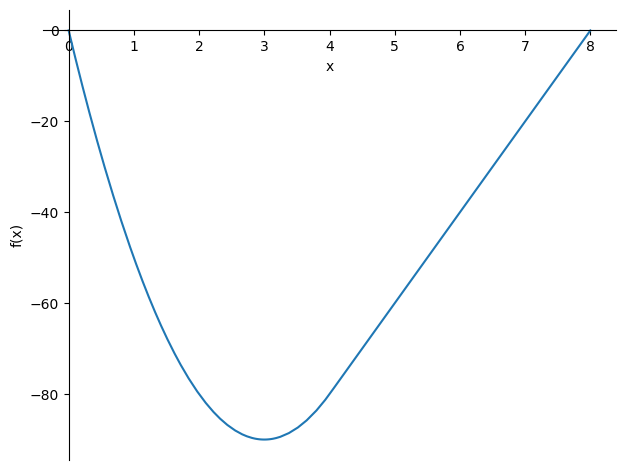

60*SingularityFunction(x, 0, 0) - 20*SingularityFunction(x, 0, 1) + 20*SingularityFunction(x, 4, 1) + 20*SingularityFunction(x, 8, 0)

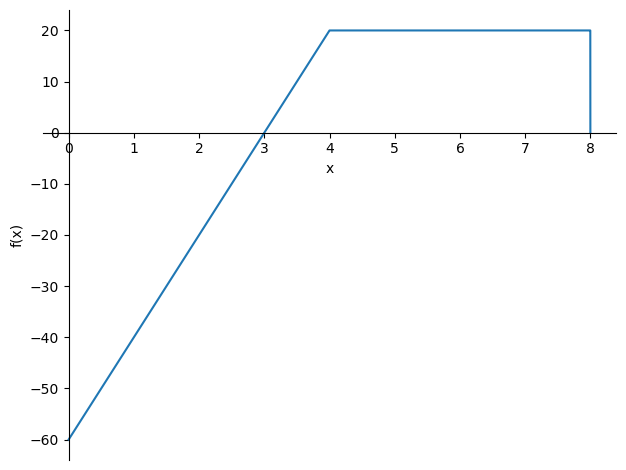

In [8]:
M_subs = M_sol.subs(q0,20)
display(M_subs)
sp.plot(-M_subs,(x,0,8))
V_subs = V_sol.subs(q0,20)
display(V_subs)
sp.plot(-V_subs,(x,0,8));

The influence of the support reactions and load can be splitted:

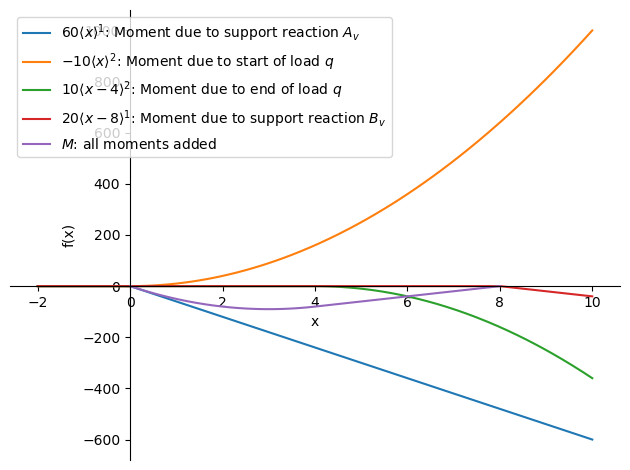

In [9]:
p0 = sp.plotting.plot(-M_subs.args[3],(x,-2,10),label='$'+sp.latex(M_subs.args[3])+'$'+": Moment due to support reaction $A_v$",legend=True,show=False)
p1 = sp.plotting.plot(-M_subs.args[0],(x,-2,10),label='$'+sp.latex(M_subs.args[0])+'$'+": Moment due to start of load $q$",show=False)
p2 = sp.plotting.plot(-M_subs.args[1],(x,-2,10),label='$'+sp.latex(M_subs.args[1])+'$'+": Moment due to end of load $q$",show=False)
p3 = sp.plotting.plot(-M_subs.args[2],(x,-2,10),label='$'+sp.latex(M_subs.args[2])+'$'+": Moment due to support reaction $B_v$",show=False)
p4 = sp.plotting.plot(-M_subs,(x,0,8),label='$M$: all moments added',show=False)
p0.append(p1[0])
p0.append(p2[0])
p0.append(p3[0])
p0.append(p4[0])
p0.show()

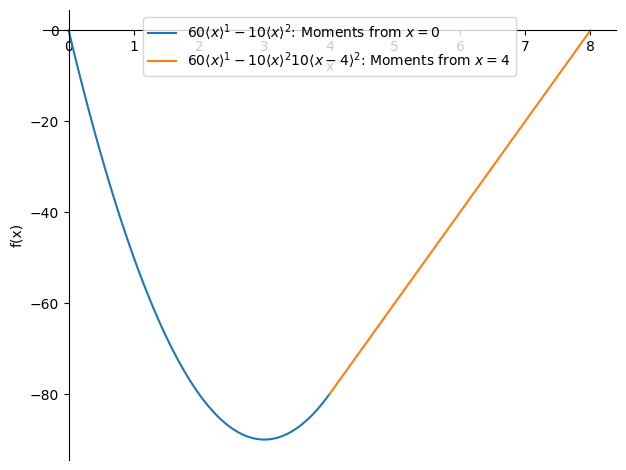

In [10]:
p0 = sp.plotting.plot(-M_subs.args[3]-M_subs.args[0],(x,0,4),label='$'+sp.latex(M_subs.args[3])+sp.latex(M_subs.args[0])+'$'+": Moments from $x = 0$",legend=True,show=False)
p2 = sp.plotting.plot(-M_subs.args[3]-M_subs.args[0]-M_subs.args[1],(x,4,8),label='$'+sp.latex(M_subs.args[3])+sp.latex(M_subs.args[0])+sp.latex(M_subs.args[1])+'$'+": Moments from $x = 4$",show=False)
p0.append(p2[0])
p0.show()

The displacement is found by integrating and solving for with the boundary conditions:

In [11]:
kappa = M_sol / EI
phi = sp.integrate(kappa,x)+C1
display(phi)
w = -sp.integrate(phi,x) + C2
display(w)

C1 + (3*q0*SingularityFunction(x, 0, 2)/2 - q0*SingularityFunction(x, 0, 3)/6 + q0*SingularityFunction(x, 4, 3)/6 + q0*SingularityFunction(x, 8, 2)/2)/EI

-C1*x + C2 - (q0*SingularityFunction(x, 0, 3)/2 - q0*SingularityFunction(x, 0, 4)/24 + q0*SingularityFunction(x, 4, 4)/24 + q0*SingularityFunction(x, 8, 3)/6)/EI

Eq(C2, 0)

Eq(-8*C1 + C2 - 96*q0/EI, 0)

0.0015*SingularityFunction(x, 0, 2) - 0.000166666666666667*SingularityFunction(x, 0, 3) + 0.000166666666666667*SingularityFunction(x, 4, 3) + 0.0005*SingularityFunction(x, 8, 2) - 0.012

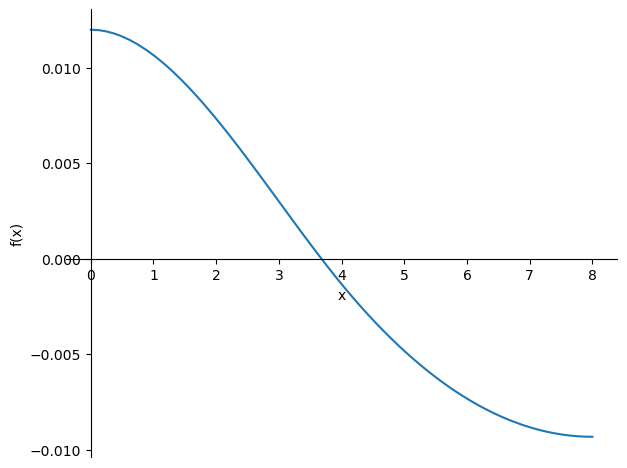

0.012*x - 0.0005*SingularityFunction(x, 0, 3) + 4.16666666666667e-5*SingularityFunction(x, 0, 4) - 4.16666666666667e-5*SingularityFunction(x, 4, 4) - 0.000166666666666667*SingularityFunction(x, 8, 3)

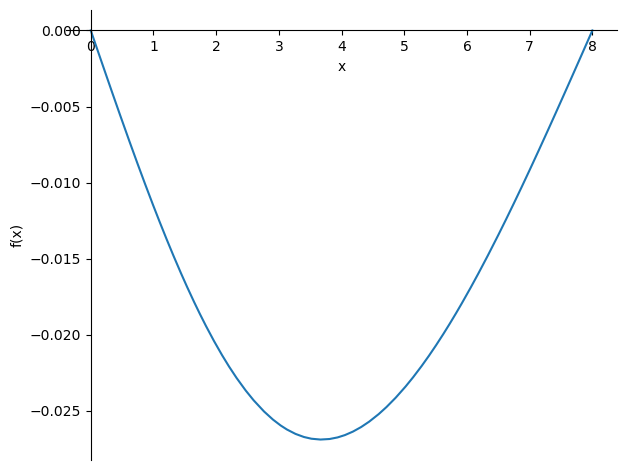

In [12]:
eq3 = sp.Eq(w.subs(x,0),0)
display(eq3)
eq4 = sp.Eq(w.subs(x,8),0)
display(eq4)
sol = sp.solve((eq3,eq4),(C1,C2))
w_sol = w.subs(sol)
phi_sol = phi.subs(sol)
w_subs = w_sol.subs(((q0,20),(EI,10e-2 * 2e5)))
phi_subs = phi_sol.subs(((q0,20),(EI,10e-2 * 2e5)))
display(phi_subs)
sp.plot(-phi_subs,(x,0,8))
display(w_subs)
sp.plot(-w_subs,(x,0,8));

Again, the influence of the support reactions and load can be splitted:

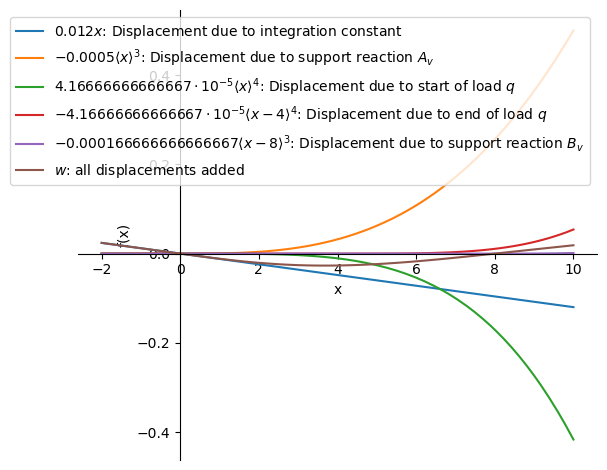

In [13]:
p0 = sp.plotting.plot(-w_subs.args[1],(x,-2,10),label='$'+sp.latex(w_subs.args[1])+'$'+": Displacement due to integration constant",legend=True,show=False)
p1 = sp.plotting.plot(-w_subs.args[2],(x,-2,10),label='$'+sp.latex(w_subs.args[2])+'$'+": Displacement due to support reaction $A_v$",show=False)
p2 = sp.plotting.plot(-w_subs.args[0],(x,-2,10),label='$'+sp.latex(w_subs.args[0])+'$'+": Displacement due to start of load $q$",show=False)
p3 = sp.plotting.plot(-w_subs.args[3],(x,-2,10),label='$'+sp.latex(w_subs.args[3])+'$'+": Displacement due to end of load $q$",show=False)
p4 = sp.plotting.plot(-w_subs.args[4],(x,-2,10),label='$'+sp.latex(w_subs.args[4])+'$'+": Displacement due to support reaction $B_v$",show=False)
p5 = sp.plotting.plot(-w_subs,(x,-2,10),label='$w$: all displacements added',show=False)
p0.append(p1[0])
p0.append(p2[0])
p0.append(p3[0])
p0.append(p4[0])
p0.append(p5[0])
p0.show()

## Finding $M$- and $V$-line ##
<div>
<img src="data\data_Singularity_function_with_hinged_beam\Constructie.gif" width="500"/>
</div>
As this is again a statically determinate structure, first the $M$- and $V$-line are solved for.

In [14]:
C1, C2, C3, C4, C5, x, EI = sp.symbols('C1, C2, C3, C4, C5, x, EI')
A_m, A_v, B_v = sp.symbols('A_m, A_v, B_v')
q0 = sp.symbols('q0')
F  = sp.symbols('F')

In [15]:
q = A_m * sp.SingularityFunction(x,0,-2) + A_v * sp.SingularityFunction(x,0,-1) + q0 *sp.SingularityFunction(x,0,0)- q0*sp.SingularityFunction(x,4,0) + F * sp.SingularityFunction(x,6,-1) + B_v * sp.SingularityFunction(x,8,-1)
display(q)

A_m*SingularityFunction(x, 0, -2) + A_v*SingularityFunction(x, 0, -1) + B_v*SingularityFunction(x, 8, -1) + F*SingularityFunction(x, 6, -1) + q0*SingularityFunction(x, 0, 0) - q0*SingularityFunction(x, 4, 0)

In [16]:
V1 = -sp.integrate(q,x)
display(V1)
M1 = sp.integrate(V1,x)
display(M1)

-A_m*SingularityFunction(x, 0, -1) - A_v*SingularityFunction(x, 0, 0) - B_v*SingularityFunction(x, 8, 0) - F*SingularityFunction(x, 6, 0) - q0*SingularityFunction(x, 0, 1) + q0*SingularityFunction(x, 4, 1)

-A_m*SingularityFunction(x, 0, 0) - A_v*SingularityFunction(x, 0, 1) - B_v*SingularityFunction(x, 8, 1) - F*SingularityFunction(x, 6, 1) - q0*SingularityFunction(x, 0, 2)/2 + q0*SingularityFunction(x, 4, 2)/2

Now the force and moment equilibria can be specified by substituting $x=10$ for the equilibrium of the whole structure and $x=4$ for the equilibrium of the structure up to the hinge.

In [17]:
eq1 = sp.Eq(V1.subs(x,10),0)
eq2 = sp.Eq(M1.subs(x,10),0)
eq3 = sp.Eq(M1.subs(x,4),0)
display(eq1)
display(eq2)
display(eq3)

Eq(-A_v - B_v - F - 4*q0, 0)

Eq(-A_m - 10*A_v - 2*B_v - 4*F - 32*q0, 0)

Eq(-A_m - 4*A_v - 8*q0, 0)

The three unknown support reactions can now be solved

In [18]:
sol = sp.solve((eq1,eq2,eq3),(A_m,A_v,B_v))
display(sol)

{A_m: 2*F + 8*q0, A_v: -F/2 - 4*q0, B_v: -F/2}

The $M-$ and $V-$lines can now be found by subsituting our support reactions

-F*SingularityFunction(x, 6, 1) + F*SingularityFunction(x, 8, 1)/2 - q0*SingularityFunction(x, 0, 2)/2 + q0*SingularityFunction(x, 4, 2)/2 - (-F/2 - 4*q0)*SingularityFunction(x, 0, 1) - (2*F + 8*q0)*SingularityFunction(x, 0, 0)

-F*SingularityFunction(x, 6, 0) + F*SingularityFunction(x, 8, 0)/2 - q0*SingularityFunction(x, 0, 1) + q0*SingularityFunction(x, 4, 1) - (-F/2 - 4*q0)*SingularityFunction(x, 0, 0) - (2*F + 8*q0)*SingularityFunction(x, 0, -1)

-360*SingularityFunction(x, 0, 0) + 130*SingularityFunction(x, 0, 1) - 10*SingularityFunction(x, 0, 2) + 10*SingularityFunction(x, 4, 2) - 100*SingularityFunction(x, 6, 1) + 50*SingularityFunction(x, 8, 1)

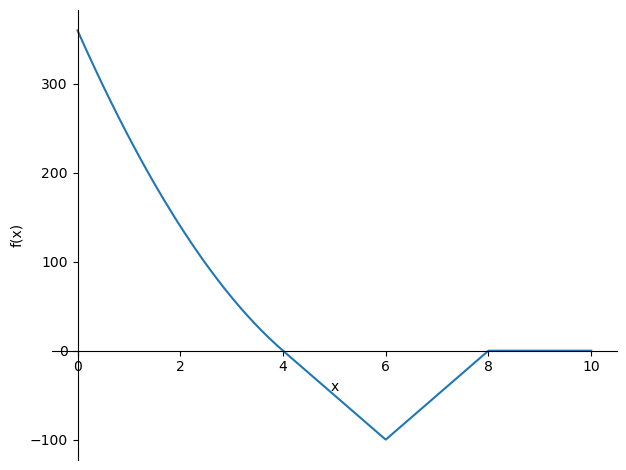

-360*SingularityFunction(x, 0, -1) + 130*SingularityFunction(x, 0, 0) - 20*SingularityFunction(x, 0, 1) + 20*SingularityFunction(x, 4, 1) - 100*SingularityFunction(x, 6, 0) + 50*SingularityFunction(x, 8, 0)

C:\Users\tomvanwoudenbe\Anaconda3\lib\site-packages\sympy\plotting\plot.py:1618: RuntimeWarning: invalid value encountered in double_scalars
  cos_theta = dot_product / (vector_a_norm * vector_b_norm)


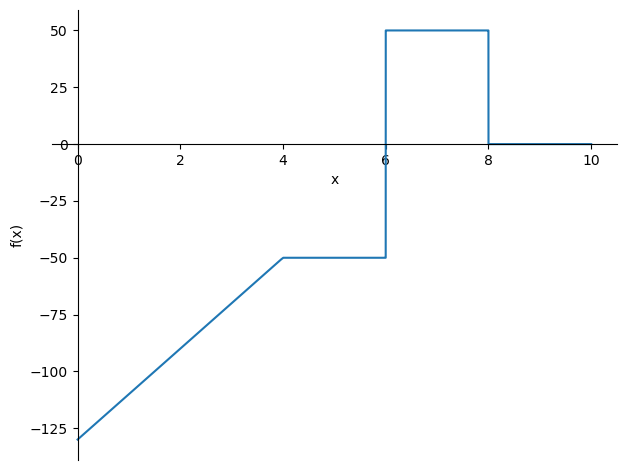

In [19]:
M_sol = M1.subs(sol)
display(M_sol)
V_sol = V1.subs(sol)
display(V_sol)
M_subs = M_sol.subs(((q0,20),(F,100)))
display(M_subs)
sp.plot(-M_subs,(x,0,10))
V_subs = V_sol.subs(((q0,20),(F,100)))
display(V_subs)
sp.plot(-V_subs,(x,0,10));

## Finding $W$- and $\phi$-line ##
Now the displacement function is solved for. An unknown jump in the $\phi$-line (and consequently kink in the $w$-line) is added to account for the hinge.

In [20]:
kappa = M_sol.subs(sol) / EI
phi = sp.integrate(kappa,x)+C1 + C2*sp.SingularityFunction(x,4,0)
display(phi)
w = -sp.integrate(phi,x) + C3
display(w)

C1 + C2*SingularityFunction(x, 4, 0) + (-2*F*SingularityFunction(x, 0, 1) + F*SingularityFunction(x, 0, 2)/4 - F*SingularityFunction(x, 6, 2)/2 + F*SingularityFunction(x, 8, 2)/4 - 8*q0*SingularityFunction(x, 0, 1) + 2*q0*SingularityFunction(x, 0, 2) - q0*SingularityFunction(x, 0, 3)/6 + q0*SingularityFunction(x, 4, 3)/6)/EI

-C1*x - C2*SingularityFunction(x, 4, 1) + C3 - (-F*SingularityFunction(x, 0, 2) + F*SingularityFunction(x, 0, 3)/12 - F*SingularityFunction(x, 6, 3)/6 + F*SingularityFunction(x, 8, 3)/12 - 4*q0*SingularityFunction(x, 0, 2) + 2*q0*SingularityFunction(x, 0, 3)/3 - q0*SingularityFunction(x, 0, 4)/24 + q0*SingularityFunction(x, 4, 4)/24)/EI

Eq(C3, 0)

Eq(C1, 0)

Eq(-8*C1 - 4*C2 + C3 - (-68*F/3 - 224*q0/3)/EI, 0)

-(17*F + 56*q0)*SingularityFunction(x, 4, 1)/(3*EI) - (-F*SingularityFunction(x, 0, 2) + F*SingularityFunction(x, 0, 3)/12 - F*SingularityFunction(x, 6, 3)/6 + F*SingularityFunction(x, 8, 3)/12 - 4*q0*SingularityFunction(x, 0, 2) + 2*q0*SingularityFunction(x, 0, 3)/3 - q0*SingularityFunction(x, 0, 4)/24 + q0*SingularityFunction(x, 4, 4)/24)/EI

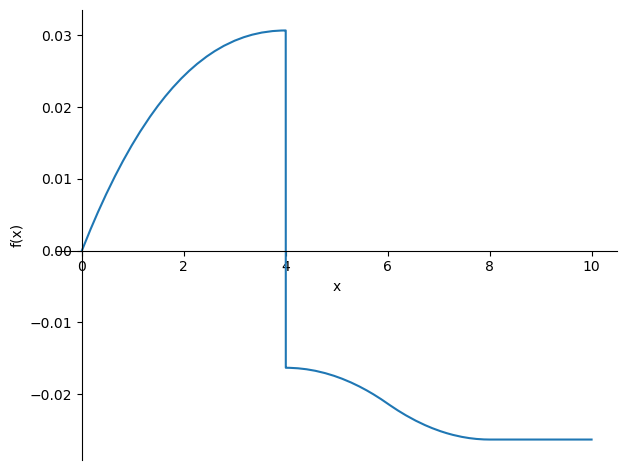

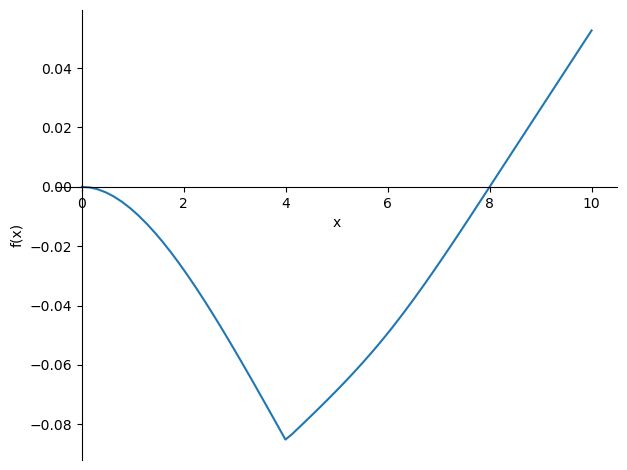

In [21]:
eq4 = sp.Eq(w.subs(x,0),0)
display(eq4)
eq5 = sp.Eq(phi.subs(x,0),0)
display(eq5)
eq6 = sp.Eq(w.subs(x,8),0)
display(eq6)
sol = sp.solve((eq4,eq5,eq6),(C1,C2,C3))
w_sol = w.subs(sol)
display(w_sol)
phi_sol = phi.subs(sol)
sp.plot(-phi_sol.subs(((q0,20),(F,100),(EI, 10e-2 * 2e5))),(x,0,10));
sp.plot(-w_sol.subs(((q0,20),(F,100),(EI, 10e-2 * 2e5))),(x,0,10));

## Direct solving ##
Now the same problem is solved directly for the displacements

In [22]:
q = A_m * sp.SingularityFunction(x,0,-2) + A_v * sp.SingularityFunction(x,0,-1) + 20 *sp.SingularityFunction(x,0,0)-20*sp.SingularityFunction(x,4,0) + 100 * sp.SingularityFunction(x,6,-1) + B_v * sp.SingularityFunction(x,8,-1)

In [23]:
V = -sp.integrate(q,x)
M = sp.integrate(V,x)

In [24]:
eq1 = sp.Eq(V.subs(x,10),0)
eq2 = sp.Eq(M.subs(x,10),0)
eq3 = sp.Eq(M.subs(x,4),0)
display(eq1)
display(eq2)
display(eq3)

Eq(-A_v - B_v - 180, 0)

Eq(-A_m - 10*A_v - 2*B_v - 1040, 0)

Eq(-A_m - 4*A_v - 160, 0)

In [25]:
kappa = M / EI
phi = sp.integrate(kappa,x) + C1 + C2*sp.SingularityFunction(x,4,0)
w = -sp.integrate(phi,x) + C3
display(w)

-C1*x - C2*SingularityFunction(x, 4, 1) + C3 - (-A_m*SingularityFunction(x, 0, 2)/2 - A_v*SingularityFunction(x, 0, 3)/6 - B_v*SingularityFunction(x, 8, 3)/6 - 5*SingularityFunction(x, 0, 4)/6 + 5*SingularityFunction(x, 4, 4)/6 - 50*SingularityFunction(x, 6, 3)/3)/EI

In [26]:
eq4 = sp.Eq(w.subs(x,0),0)
display(eq4)
eq5 = sp.Eq(phi.subs(x,0),0)
display(eq5)
eq6 = sp.Eq(w.subs(x,8),0)
display(eq6)

Eq(C3, 0)

Eq(C1, 0)

Eq(-8*C1 - 4*C2 + C3 - (-32*A_m - 256*A_v/3 - 10000/3)/EI, 0)

In [27]:
sol = sp.solve((eq1,eq2,eq3,eq4,eq5,eq6),(C1,C2,C3,A_m,A_v,B_v))
display(sol)

{C1: 0, C2: 940/EI, C3: 0, A_m: 360, A_v: -130, B_v: -50}

-360*SingularityFunction(x, 0, 0) + 130*SingularityFunction(x, 0, 1) - 10*SingularityFunction(x, 0, 2) + 10*SingularityFunction(x, 4, 2) - 100*SingularityFunction(x, 6, 1) + 50*SingularityFunction(x, 8, 1)

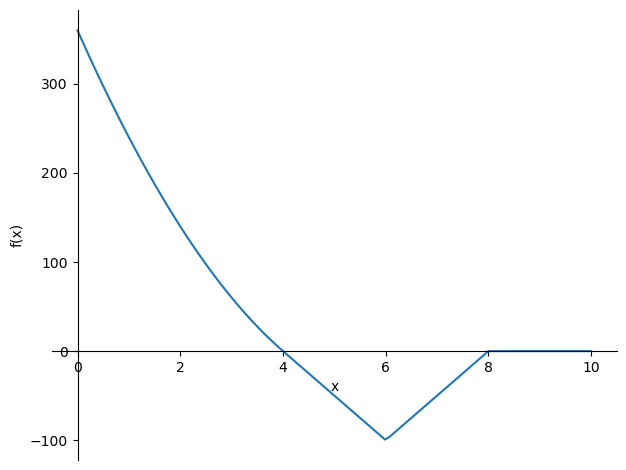

-(-180*SingularityFunction(x, 0, 2) + 65*SingularityFunction(x, 0, 3)/3 - 5*SingularityFunction(x, 0, 4)/6 + 5*SingularityFunction(x, 4, 4)/6 - 50*SingularityFunction(x, 6, 3)/3 + 25*SingularityFunction(x, 8, 3)/3)/EI - 940*SingularityFunction(x, 4, 1)/EI

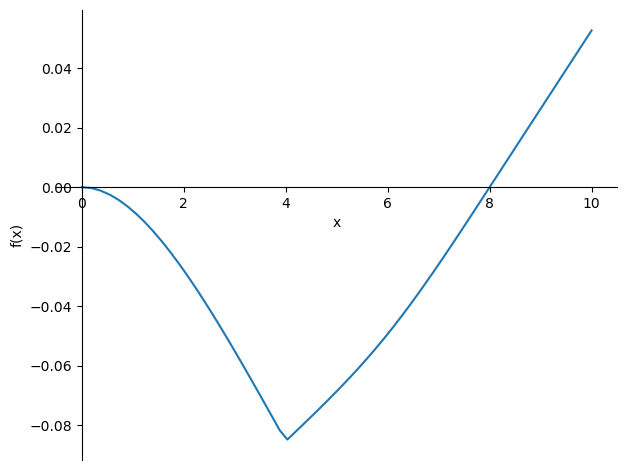

In [28]:
M_sol = M.subs(sol)
display(M_sol)
sp.plot(-M_sol.subs(EI, 10e-2 * 2e5),(x,0,10))
w_sol = w.subs(sol)
display(w_sol)
sp.plot(-w_sol.subs(EI, 10e-2 * 2e5),(x,0,10));

## Statically  indeterminate structure ##
Now a statically indeterminate structure is solved,
<div>
<img src="data\data_Singularity_function_with_hinged_beam\Constructie2.gif" width="500"/>
</div>
This adds one additional support reaction to be solved, but the additional equation is provided by $w(10)=0$

In [29]:
C_v = sp.symbols('C_v')
q = A_m * sp.SingularityFunction(x,0,-2) + A_v * sp.SingularityFunction(x,0,-1) + 20 *sp.SingularityFunction(x,0,0)-20*sp.SingularityFunction(x,4,0) + 100 * sp.SingularityFunction(x,6,-1) + B_v * sp.SingularityFunction(x,8,-1) + C_v * sp.SingularityFunction(x,10,-1)

In [30]:
V = -sp.integrate(q,x)
M = sp.integrate(V,x)

In [31]:
eq1 = sp.Eq(V.subs(x,10),0)
eq2 = sp.Eq(M.subs(x,10),0)
eq3 = sp.Eq(M.subs(x,4),0)
display(eq1)
display(eq2)
display(eq3)

Eq(-A_v - B_v - C_v - 180, 0)

Eq(-A_m - 10*A_v - 2*B_v - 1040, 0)

Eq(-A_m - 4*A_v - 160, 0)

In [32]:
kappa = M / EI
phi = sp.integrate(kappa,x) + C1 + C2*sp.SingularityFunction(x,4,0)
w = -sp.integrate(phi,x) + C3
display(w)

-C1*x - C2*SingularityFunction(x, 4, 1) + C3 - (-A_m*SingularityFunction(x, 0, 2)/2 - A_v*SingularityFunction(x, 0, 3)/6 - B_v*SingularityFunction(x, 8, 3)/6 - C_v*SingularityFunction(x, 10, 3)/6 - 5*SingularityFunction(x, 0, 4)/6 + 5*SingularityFunction(x, 4, 4)/6 - 50*SingularityFunction(x, 6, 3)/3)/EI

In [33]:
eq4 = sp.Eq(w.subs(x,0),0)
display(eq4)
eq5 = sp.Eq(phi.subs(x,0),0)
display(eq5)
eq6 = sp.Eq(w.subs(x,8),0)
display(eq6)
eq7 = sp.Eq(w.subs(x,10),0)
display(eq7)

Eq(C3, 0)

Eq(C1, 0)

Eq(-8*C1 - 4*C2 + C3 - (-32*A_m - 256*A_v/3 - 10000/3)/EI, 0)

Eq(-10*C1 - 6*C2 + C3 - (-50*A_m - 500*A_v/3 - 4*B_v/3 - 8320)/EI, 0)

In [34]:
sol = sp.solve((eq1,eq2,eq3,eq4,eq5,eq6,eq7),(C1,C2,C3,A_m,A_v,B_v,C_v))
display(sol)

{C1: 0, C2: 1556/(3*EI), C3: 0, A_m: 202, A_v: -181/2, B_v: -337/2, C_v: 79}

-202*SingularityFunction(x, 0, 0) + 181*SingularityFunction(x, 0, 1)/2 - 10*SingularityFunction(x, 0, 2) + 10*SingularityFunction(x, 4, 2) - 100*SingularityFunction(x, 6, 1) + 337*SingularityFunction(x, 8, 1)/2 - 79*SingularityFunction(x, 10, 1)

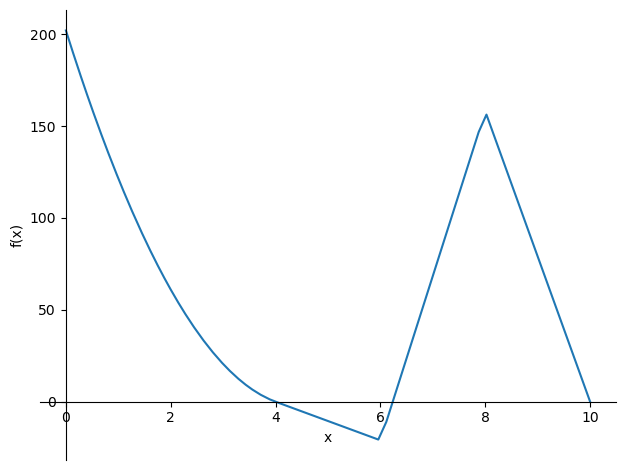

-202*SingularityFunction(x, 0, -1) + 181*SingularityFunction(x, 0, 0)/2 - 20*SingularityFunction(x, 0, 1) + 20*SingularityFunction(x, 4, 1) - 100*SingularityFunction(x, 6, 0) + 337*SingularityFunction(x, 8, 0)/2 - 79*SingularityFunction(x, 10, 0)

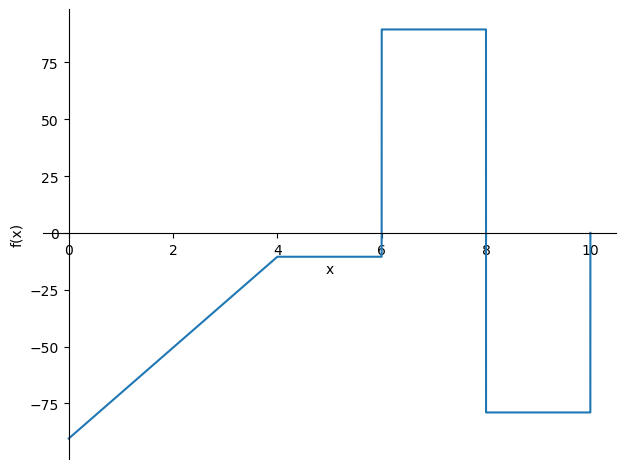

-(-180*SingularityFunction(x, 0, 2) + 65*SingularityFunction(x, 0, 3)/3 - 5*SingularityFunction(x, 0, 4)/6 + 5*SingularityFunction(x, 4, 4)/6 - 50*SingularityFunction(x, 6, 3)/3 + 25*SingularityFunction(x, 8, 3)/3)/EI - 940*SingularityFunction(x, 4, 1)/EI

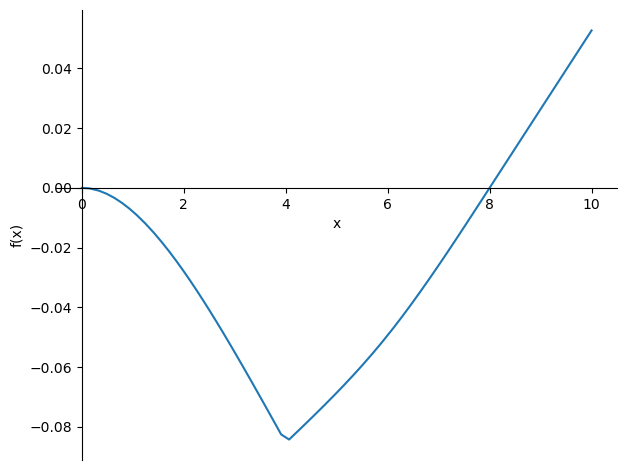

In [35]:
display(M.subs(sol))
sp.plot(-M.subs(sol),(x,0,10))
display(V.subs(sol))
sp.plot(-V.subs(sol),(x,0,10))
display(w_sol.subs(sol))
sp.plot(-w_sol.subs(EI,10e-2 * 2e5).subs(sol),(x,0,10));